In [99]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib
matplotlib.rc('figure', figsize=(12,6))

In [100]:
df = pd.read_csv('master.csv')

In [101]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [102]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [103]:
df.shape

(27820, 12)

In [104]:
df.drop(['HDI for year' , 'generation' , 'country-year'] , axis = 1 , inplace = True)

In [105]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796


In [106]:
df = df.loc[(df['year'] < 2016)]

In [107]:
suicides = df.groupby('year')['suicides_no'].sum().sort_values(ascending = False)
suicides

year
1999    256119
2002    256095
2003    256079
2000    255832
2001    250652
1998    249591
1996    246725
1995    243544
2009    243487
2004    240861
1997    240745
2010    238702
2011    236484
2008    235447
2005    234375
2007    233408
2006    233361
1994    232063
2012    230160
2013    223199
2014    222984
1993    221565
1992    211473
2015    203640
1991    198020
1990    193361
1989    160244
1987    126842
1988    121026
1986    120670
1985    116063
Name: suicides_no, dtype: int64

In [108]:
year = pd.DataFrame(suicides).reset_index()

In [139]:
px.scatter(year , x = 'year' , y = 'suicides_no' , color = 'suicides_no' , title = 'Suicides Over the Years')

In [110]:
country = df.groupby('country')['suicides_no'].sum().sort_values(ascending = False)[:10]
country

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

In [111]:
top_countries = pd.DataFrame(country).reset_index()[:10]
top_countries

,country,suicides_no
0,Russian Federation,1209742
1,United States,1034013
2,Japan,806902
3,France,329127
4,Ukraine,319950
5,Germany,291262
6,Republic of Korea,261730
7,Brazil,226613
8,Poland,139098
9,United Kingdom,136805


In [112]:
px.bar(top_countries , x = 'country' , y = 'suicides_no' , color = 'country')

In [146]:
gender = df.groupby(['sex' , 'year'])['suicides_no'].sum()
gender

sex     year
female  1985     32479
        1986     33852
        1987     35006
        1988     33015
        1989     41361
                 ...  
male    2011    181868
        2012    177149
        2013    171740
        2014    171428
        2015    156392
Name: suicides_no, Length: 62, dtype: int64

In [147]:
genders = pd.DataFrame(gender).reset_index()
genders

,sex,year,suicides_no
0,female,1985,32479
1,female,1986,33852
2,female,1987,35006
3,female,1988,33015
4,female,1989,41361
...,...,...,...
57,male,2011,181868
58,male,2012,177149
59,male,2013,171740
60,male,2014,171428


In [148]:
px.line(genders , x = 'year' , y = 'suicides_no' , color = 'sex' , title = 'Suicides Among Genders')

In [116]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796


In [117]:
age = pd.DataFrame(df.groupby(['age' , 'sex'])['suicides_no'].sum()).reset_index()
age

,age,sex,suicides_no
0,15-24 years,female,175199
1,15-24 years,male,632148
2,25-34 years,female,208450
3,25-34 years,male,913392
4,35-54 years,female,505001
5,35-54 years,male,1941374
6,5-14 years,female,16997
7,5-14 years,male,35267
8,55-74 years,female,428917
9,55-74 years,male,1224811


In [118]:
px.bar(age , x = 'age', y = 'suicides_no' , color = 'sex' ,title = 'Suicides Relation with Age' , color_discrete_sequence = ('pink' , 'purple'))

In [119]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796


In [154]:
countries = df.groupby('country')['suicides_no'].sum().sort_values(ascending= False)[:10].index
top_10 = pd.DataFrame(columns = df.columns)
for country in countries:
    top_10 = top_10.append(df[df['country'] == country])


In [156]:
top_10

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
20936,Russian Federation,1989,male,75+ years,1393,1349100,103.25,"506,500,173,960",3740
20937,Russian Federation,1989,male,35-54 years,12030,18058500,66.62,"506,500,173,960",3740
20938,Russian Federation,1989,male,55-74 years,6250,9383700,66.60,"506,500,173,960",3740
20939,Russian Federation,1989,male,25-34 years,6856,12748800,53.78,"506,500,173,960",3740
20940,Russian Federation,1989,female,75+ years,1677,4738100,35.39,"506,500,173,960",3740
...,...,...,...,...,...,...,...,...,...
26843,United Kingdom,2015,female,25-34 years,181,4414464,4.10,"2,885,570,309,161",47240
26844,United Kingdom,2015,female,75+ years,108,3070457,3.52,"2,885,570,309,161",47240
26845,United Kingdom,2015,female,15-24 years,104,3966564,2.62,"2,885,570,309,161",47240
26846,United Kingdom,2015,female,5-14 years,6,3663221,0.16,"2,885,570,309,161",47240


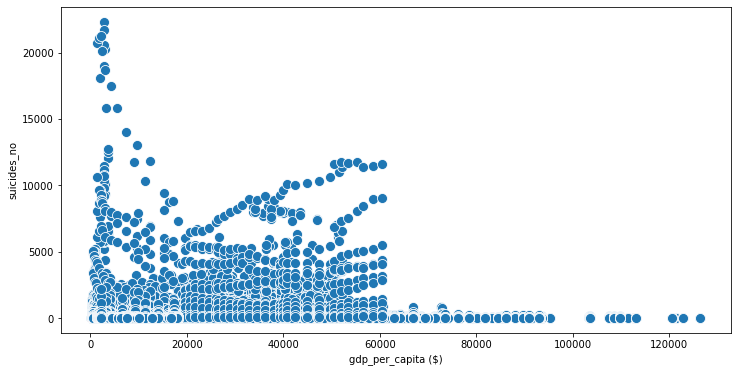

In [157]:
sns.scatterplot(data = df , x = 'gdp_per_capita ($)' , y = 'suicides_no' , s = 100);


In [158]:
per_100k = pd.DataFrame(df.groupby('country')['suicides/100k pop'].sum().sort_values(ascending = False)[:10]).reset_index()
per_100k

,country,suicides/100k pop
0,Russian Federation,11305.13
1,Lithuania,10227.16
2,Hungary,9914.73
3,Kazakhstan,9519.52
4,Republic of Korea,9350.45
5,Ukraine,8931.66
6,Austria,8893.00
7,Japan,8025.23
8,Finland,7924.11
9,Belgium,7900.50


In [167]:
px.bar(per_100k , x = 'country' , y = 'suicides/100k pop' , color = 'country')